## Set environment

In [1]:
#Mount google drive when on google colab

from google.colab import drive
drive.mount('/content/drive')

#Set working directory on google colab
%cd /content/drive/MyDrive/shape-recognition/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/shape-recognition


In [2]:
# Install packages
%pip install -r requirements.txt

## Training

In [ ]:
%run wandb disabled
%run train.py --name data-3 --epochs 10 --batch 2 --lr 0.001 --model fasterrcnn_resnet50_fpn_v2 --data configs/data-3.yaml --imgsz 1024 --no-mosaic --workers 2 --device cuda

2023-06-29 10:54:15.753107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 10:54:17.076779: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 1000
Number of validation samples: 100

Building model from scratch...
Layer (type (var_name))                            Output Shape              Param #
FasterRCNN (FasterRCNN)                            [100, 4]                  --
├─GeneralizedRCNNTransform (transform)             [2, 3, 800, 800]          --
├─BackboneWithFPN (backbone)                       [2, 256, 13, 13]          --
│    └─IntermediateLayerGetter (body)              [2, 2048, 25, 25]   

In [ ]:
#%run train.py --resume-training --name data-3 --epochs 10 --batch 2 --lr 0.001 --model fasterrcnn_resnet50_fpn_v2 --weights outputs/training/data-3/last_model.pth --data configs/data-3.yaml --imgsz 1024 --no-mosaic --workers 2 --device cuda

## Visualize Object Detection Results



test0000.jpg


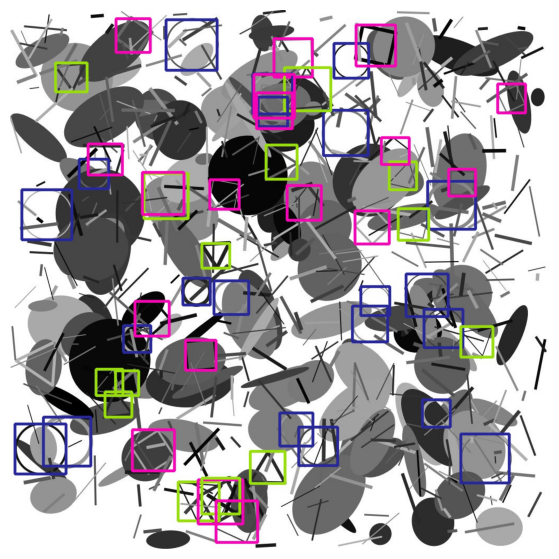



test0001.jpg


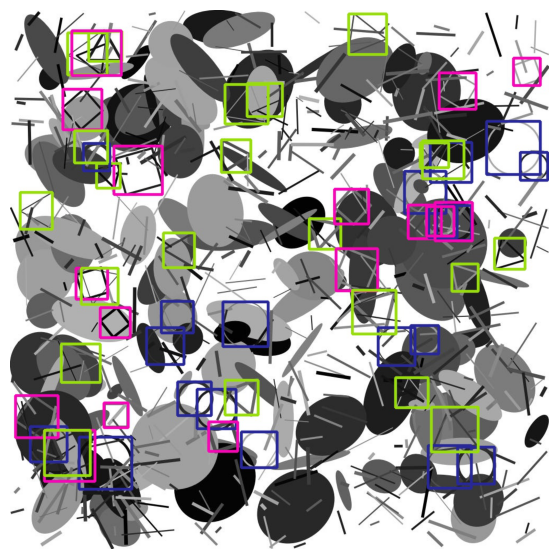



test0002.jpg


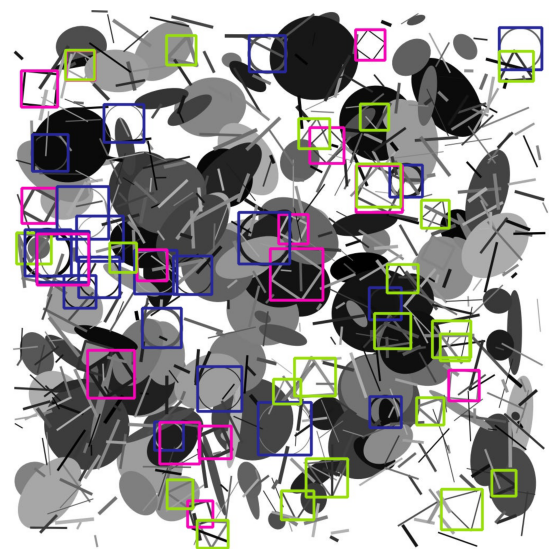

<Figure size 640x480 with 0 Axes>

In [2]:
%run detect.py --input data/test-3 --threshold 0.3 --show --no-labels --weights outputs/training/data-3/best_model.pth --data configs/data-3.yaml --model fasterrcnn_resnet50_fpn_v2 --device cuda --imgsz 1024

## Evaluation on Test Data

In [6]:
%run eval.py --data configs/data-3.yaml --weights outputs/training/data-3/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024
%run eval.py --data configs/data-2.yaml --weights outputs/training/data-3/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024
%run eval.py --data configs/data-1.yaml --weights outputs/training/data-3/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024
%run eval.py --data configs/data-0.yaml --weights outputs/training/data-3/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024


INFO:utils.logging:Test:  [ 0/25]  eta: 0:00:37    time: 1.5151  data: 0.8706  max mem: 3379
INFO:utils.logging:Test:  [24/25]  eta: 0:00:00    time: 0.5697  data: 0.0153  max mem: 3379
INFO:utils.logging:Test: Total time: 0:00:15 (0.6114 s / it)




Test data from configs/data-3.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.918               | 0.935               |
| 3               | 0.724               | 0.768               |
| 4               | 0.818               | 0.845               |
---------------------------------------------------------------
| Avg             | 0.820               | 0.849               |
---------------------------------------------------------------




INFO:utils.logging:Test:  [ 0/25]  eta: 0:00:38    time: 1.5446  data: 0.8572  max mem: 3379
INFO:utils.logging:Test:  [24/25]  eta: 0:00:00    time: 0.5590  data: 0.0136  max mem: 3379
INFO:utils.logging:Test: Total time: 0:00:15 (0.6096 s / it)




Test data from configs/data-2.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.968               | 0.978               |
| 3               | 0.843               | 0.876               |
| 4               | 0.909               | 0.929               |
---------------------------------------------------------------
| Avg             | 0.907               | 0.927               |
---------------------------------------------------------------




INFO:utils.logging:Test:  [ 0/25]  eta: 0:00:27    time: 1.1179  data: 0.4889  max mem: 3379
INFO:utils.logging:Test:  [24/25]  eta: 0:00:00    time: 0.5585  data: 0.0131  max mem: 3379
INFO:utils.logging:Test: Total time: 0:00:14 (0.5850 s / it)




Test data from configs/data-1.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.960               | 0.972               |
| 3               | 0.860               | 0.886               |
| 4               | 0.912               | 0.930               |
---------------------------------------------------------------
| Avg             | 0.911               | 0.929               |
---------------------------------------------------------------




INFO:utils.logging:Test:  [ 0/25]  eta: 0:00:26    time: 1.0642  data: 0.4643  max mem: 3379
INFO:utils.logging:Test:  [24/25]  eta: 0:00:00    time: 0.5666  data: 0.0193  max mem: 3379
INFO:utils.logging:Test: Total time: 0:00:14 (0.5865 s / it)




Test data from configs/data-0.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.982               | 0.988               |
| 3               | 0.922               | 0.944               |
| 4               | 0.956               | 0.967               |
---------------------------------------------------------------
| Avg             | 0.953               | 0.966               |
---------------------------------------------------------------


